<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/bbc_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
def data_loader(data_path):

    f = open(data_path)
    data = json.load(f)

    return data

def column_selection(selected_column, data) :
    empty_column = []
    for i in data:
        empty_column.append(i[selected_column])

    return empty_column

def data_cleaner(txt_data):
    # if limit != None:
    clean_data = []
    empty_indices = []
    for i in range(len(txt_data)):
        if txt_data[i] != '':
                # print(content[i])
            clean_data.append(txt_data[i])
        else :
            empty_indices.append(i)
    # print(empty_indices)
    return clean_data , empty_indices        

def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            # list_object.pop(idx)
            del list_object[idx] 


def index_returner(df,unique_region):
    x = df[df['region'] == unique_region].index
    return x             

In [28]:
import os 
import json
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# import tensorflow as tf 
# from tensorflow import keras 
# from tensorflow.keras import layers
# from tensorflow.keras.layers import *

plt.style.use('ggplot')

In [29]:
input_path = 'drive/MyDrive/bbc_news_list_uk.json'
data = data_loader(input_path)
print(data[0].keys())

dict_keys(['tags', 'title', 'news_post_date', 'raw_content', 'content', 'url', 'author', 'language', '_id', 'region', 'short_description', 'category', 'crawled_at'])


In [30]:
content = column_selection('content', data)
title = column_selection('title', data)
region  = column_selection('region', data)
short_desc = column_selection('short_description', data)
category = column_selection('category', data)

In [31]:
print('content_len:', len(content))
print('title_len:', len(title))
print('region_len:', len(region))
print('desc_len:', len(short_desc))
print('category_len:', len(category))

content_len: 15825
title_len: 15825
region_len: 15825
desc_len: 15825
category_len: 15825


In [32]:
for i in range(len(region)):
    if region[i] == '':
        region[i] = 'NO_INFO'

In [33]:
clean_content,empty_indices_content = data_cleaner(content)

In [34]:
clean_title,empty_indices_title = data_cleaner(title)
clean_region,empty_indices_region = data_cleaner(region)
clean_short_desc,empty_indices_short_desc = data_cleaner(short_desc)
clean_category,empty_indices_category = data_cleaner(category)

In [35]:
# delete_multiple_element(clean_content,empty_indices_content)
delete_multiple_element(clean_title,empty_indices_content)
delete_multiple_element(clean_region,empty_indices_content)
delete_multiple_element(clean_short_desc,empty_indices_content)
delete_multiple_element(clean_category,empty_indices_content)

In [36]:
print('Clean Content Length :',len(clean_content))
print('Clean Title Length :',len(clean_title))
print('Clean Region Length :',len(clean_region))
print('Clean ShortDescription Length :',len(clean_short_desc))
print('Clean Category Length :',len(clean_category))

Clean Content Length : 15468
Clean Title Length : 15468
Clean Region Length : 15468
Clean ShortDescription Length : 15468
Clean Category Length : 15468


In [37]:
df_clean = pd.DataFrame({
    'content': clean_content,
    'title' : clean_title,
    'region' : clean_region,
    'desc' : clean_short_desc,
    'category' : clean_category
})
df_clean.head(1)

,content,title,region,desc,category
0,The heroin substitute methadone can be used as...,Why quitting heroin substitute methadone is 'v...,Health,Heroin substitute methadone is used to wean ad...,BBC News


In [38]:
print('number of unique region :',df_clean['region'].nunique())
# print(df_clean['region'].unique())

number of unique region : 84


In [39]:
new_df = pd.DataFrame(df_clean.groupby(['region'])['region'].count())
new_df = new_df.rename(columns = {'region':'counts'})
new_df = new_df.reset_index()


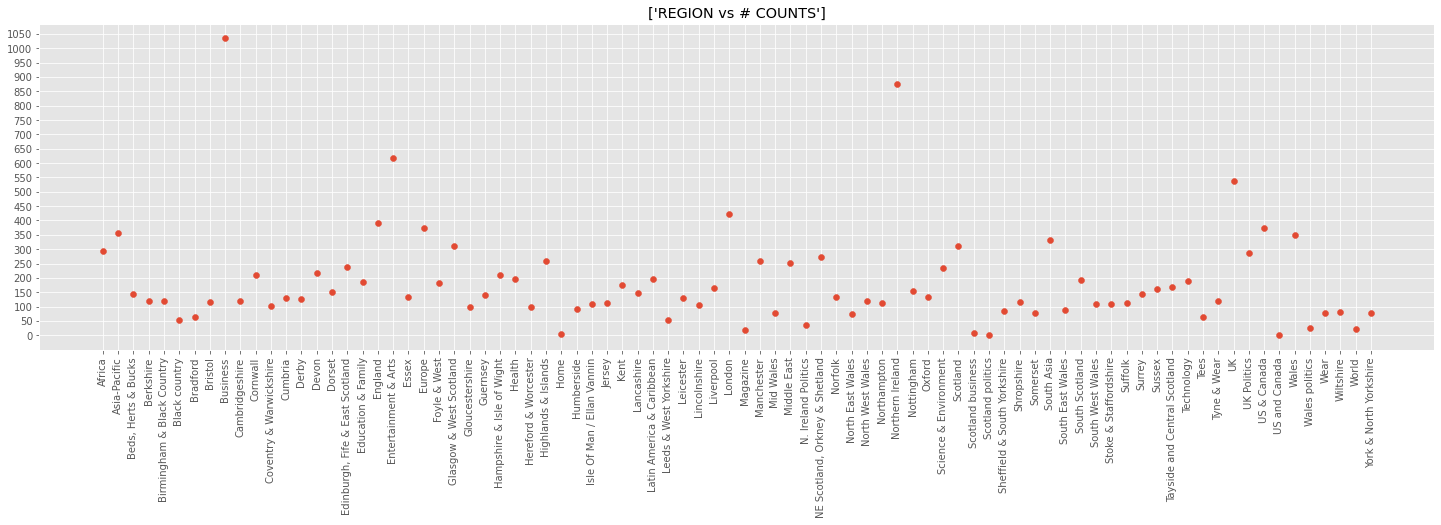

In [40]:
plt.figure(figsize=(25,6))
plt.scatter(new_df['region'], new_df['counts'])
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1100, 50));
plt.title(['REGION vs # COUNTS']);

In [41]:
# def json_maker(query, id, content, title, region, desc):
#     return {'query':str(query),'ID':id,'CONTENT':content, 'TITLE':title, 'REGION':region, 'DESCRIPTION':desc}
# def info_print(index_num):
    
#     print('CONTENT:', df_clean['content'][index_num])
#     print('TITLE:', df_clean['title'][index_num])
#     print('REGION:', df_clean['region'][index_num])
#     print('DESC:', df_clean['desc'][index_num])

In [56]:
def char_counter(x):
    return  len(x)

def token_counter(x):
    return len(x.split())

df_clean['content_char_length'] = df_clean['content'].apply(char_counter)
df_clean['content_token_length'] = df_clean['content'].apply(token_counter)

In [57]:
df_clean.head(3)

,content,title,region,desc,category,content_char_length,content_token_length
0,The heroin substitute methadone can be used as...,Why quitting heroin substitute methadone is 'v...,Health,Heroin substitute methadone is used to wean ad...,BBC News,5234,907
1,The eldest son of North Korean leader Kim Jong...,North Korea leader's eldest son 'opposes dynasty',Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News,2039,346
2,Seven oil paintings created by notorious gangs...,Paintings by gangster Reggie Kray go on sale i...,Lincolnshire,A series of oil painting produced by gangster ...,BBC News,1486,259


In [73]:
df_clean['content'][10699]

'A man is being questioned about suspected dissident republican activity, the police have said. The 43-year-old man was arrested in Lurgan on Friday.The police said he was arrested by detectives from the serious crime branch.They also said he has been taken to Antrim police station for questioning. '

In [76]:
print(len(df_clean[df_clean['content_char_length'] < 400]))
df_clean[df_clean['content_char_length'] < 400]

256


,content,title,region,desc,category,content_char_length,content_token_length
427,The health inequality gap in Britain is greate...,UK health gap: Your comments,UK,Your views on the UK's health inequality,BBC News,381,62
457,A man has been arrested in connection with an ...,Man arrested over indecent attack at university,Glasgow & West Scotland,A man is arrested in connection with an indece...,BBC News,390,62
459,A 23-year-old man is to appear in court charge...,"Man, 23, faces Larne child rape charges",Northern Ireland,A 23-year-old man is to appear in court on Fri...,BBC News,311,58
501,A 19-year-old man has sustained a knife injury...,Three men attack Derry teenager,Foyle & West,A 19-year-old man is injured following an atta...,BBC News,397,71
567,Two men have been arrested over the death of a...,Men arrested over teenager death,Glasgow & West Scotland,Two men are arrested over the death of a teena...,BBC News,378,68
...,...,...,...,...,...,...,...
15228,A 41-year-old man is due to appear at Londonde...,Man in court on firearms charges,Northern Ireland,A 41-year-old man is expected to appear at Lon...,BBC News,374,59
15299,Plans for a proposed wind farm in Somerset are...,East Huntspill wind farm plans to be exhibited,Somerset,Plans for a proposed wind farm in Somerset are...,BBC News,378,63
15314,Police are searching a Derbyshire canal for a ...,Canal search for missing Derbyshire teenager,Derby,Police are searching a Derbyshire canal for a ...,BBC News,386,64
15382,A vehicle fire at a Lincolnshire farm in the e...,Mercedes van damaged in Lincolnshire farm arso...,Lincolnshire,A vehicle fire at a Lincolnshire farm in the e...,BBC News,387,63


## CLUSTERING & DIMENSIONALITY REDUCTION

In [42]:
!pip install umap-learn -q
!pip install hdbscan -q
!pip install umap-learn[plot] -q

In [43]:
import umap ### dimensionality reduction algorithm
import hdbscan ### clustering algorithm
import umap.plot
from hdbscan import flat
import plotly.express as px

In [44]:
### BBC VECTOR EMBEDDINGS
vector_dir = 'drive/MyDrive/BBC_content_vectors.npy'
embedding_vectors = np.load(vector_dir)
print((embedding_vectors).shape)

(15468, 1536)


In [45]:
# umap_data = umap.UMAP(n_neighbors=20, n_components=2, min_dist=0, metric='euclidean').fit_transform(embedding_vectors)
umap_data = umap.UMAP(n_components=2, init = 'random', random_state = 0).fit_transform(embedding_vectors)

In [46]:
cluster = hdbscan.HDBSCAN(
                        min_cluster_size = 20,
                        metric = 'euclidean' ,
                        # cluster_selection_method = 'eom'
                        ).fit(umap_data)

In [47]:
print('NUMBER OF REDUCED DATA :',len(umap_data))
print('NUMBER OF EMBEDDINGS :',len(embedding_vectors))
print('NUMBER OF CLUSTERS :',len(set(cluster.labels_)))

NUMBER OF REDUCED DATA : 15468
NUMBER OF EMBEDDINGS : 15468
NUMBER OF CLUSTERS : 115


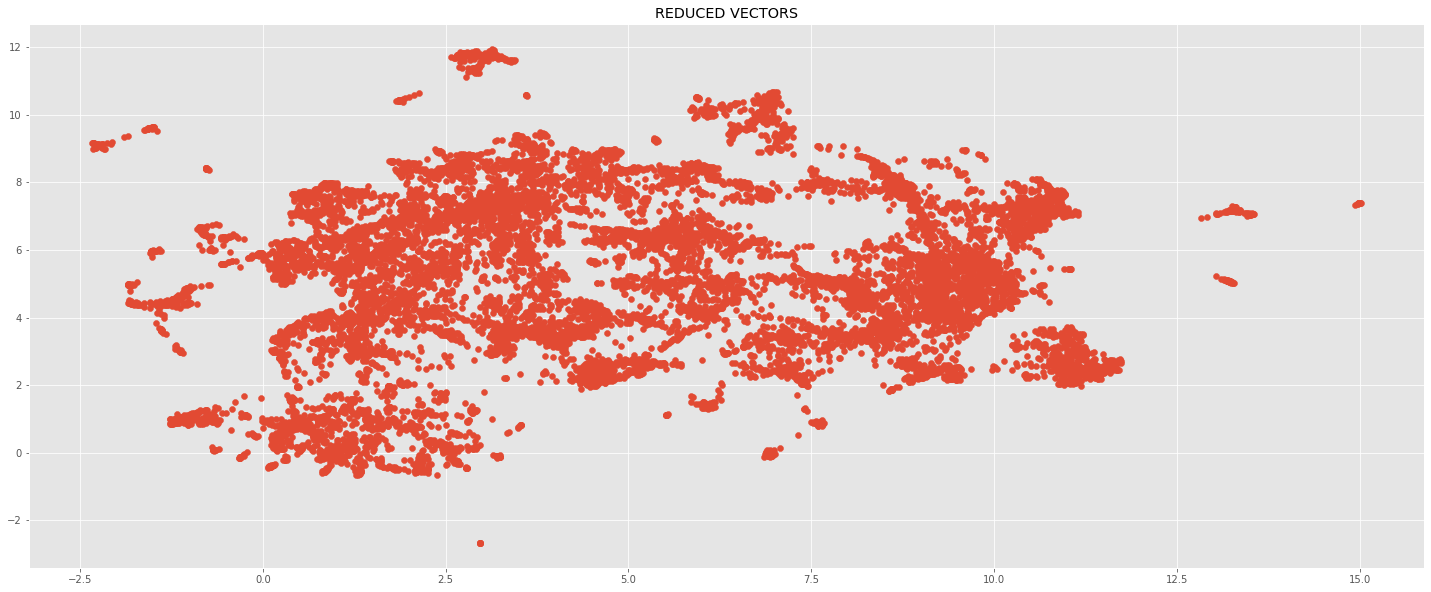

In [48]:
plt.figure(figsize=(25,10))
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.title('REDUCED VECTORS');

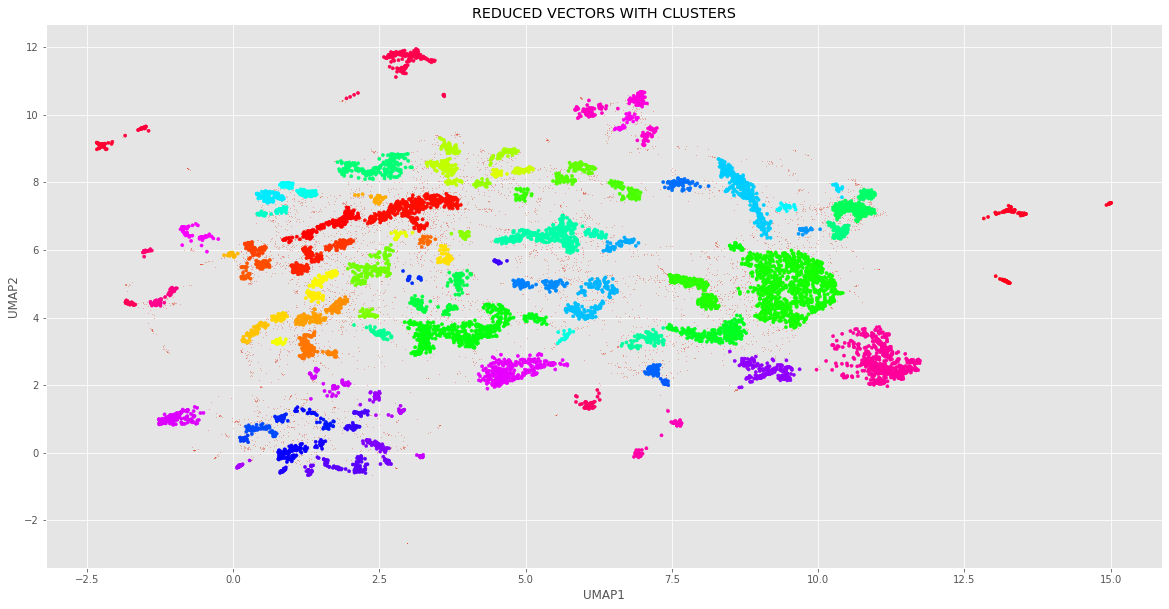

In [49]:
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y,
            # color='#BDBDBD',
            s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10,
            cmap='hsv_r'
            )
# plt.xlim([0,20])
# plt.legend([result['labels'].unique()])
# plt.colorbar()
# plt.axis('off')
plt.xlabel('UMAP1');
plt.ylabel('UMAP2');
plt.title('REDUCED VECTORS WITH CLUSTERS');

In [77]:
# umap_data_3d = umap.UMAP(n_components=3, init = 'random', random_state = 0).fit_transform(embedding_vectors)
# fig = px.scatter_3d(
#     umap_data_3d, 
#     x=0, y=1, z=2,
#     width=800, height=800,
#     color = cluster.labels_
# )
# fig.show()

In [81]:
len(np.where(np.array(cluster.labels_) == -1)[0])

4642